In [1]:
import imp
import rdkit, h5py
from rdkit import Chem
from rdkit.Chem import rdFMCS,AllChem,Draw
from rdkit import DataStructs

import numpy as np
import pandas as pd


In [2]:
#Load HDF5 file
dataset_filename = r"C:\Users\Leave\OneDrive - hust.edu.cn\大创\pcko1-Deep-Drug-Coder-d6e7ef3\datasets\CHEMBL25_TRAIN_MOLS.h5"
#dataset_filename = r"datasets/CHEMBL25_FILTERED_1.h5"
with h5py.File(dataset_filename, "r") as f:
    binmols = np.asarray(f["mols"])
    #idxs = np.asarray(f["idxs"])
    #sims = np.asarray(f["sims"])


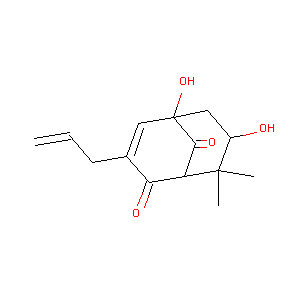

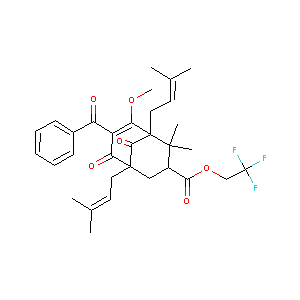

In [4]:
display(Draw.MolToImage(Chem.Mol(binmols[289256])))
display(Draw.MolToImage(Chem.Mol(binmols[1271154])))

original_mol:


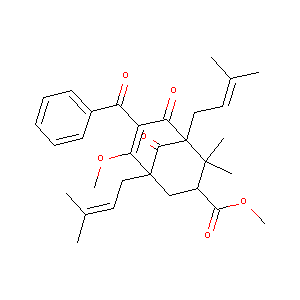

sub_mol:


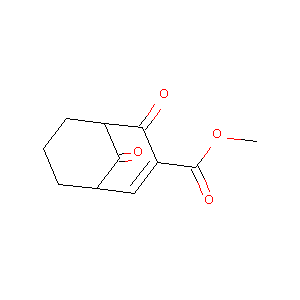

mcs_mol:


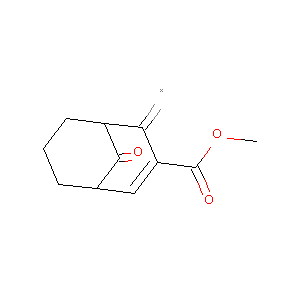

0.7368421052631579


In [8]:
def get_sim(mol, sub_mol) -> float: 
    try:
        res = rdFMCS.FindMCS([mol, sub_mol], timeout=1, bondCompare=rdFMCS.BondCompare.CompareAny, ringMatchesRingOnly=True, atomCompare=rdFMCS.AtomCompare.CompareAny)
        if res.smartsString == "" or res.canceled:
            return 0
        mcs_mol = Chem.MolFromSmarts(res.smartsString)
        Chem.SanitizeMol(mcs_mol)

        mcs_mol_fp = AllChem.GetMorganFingerprintAsBitVect(mcs_mol, 2, nBits=2048)
        sub_mol_fp = AllChem.GetMorganFingerprintAsBitVect(sub_mol, 2, nBits=2048)
        sim = DataStructs.FingerprintSimilarity(sub_mol_fp, mcs_mol_fp)

        
    except Exception as e:
        print("...Exception Occurred at {:1}:".format(Chem.MolToSmiles(mol)))
        print(e)
        return 0
    
    print("original_mol:")
    display(Draw.MolToImage(mol))
    print("sub_mol:")
    display(Draw.MolToImage(sub_mol))
    print("mcs_mol:")
    display(Draw.MolToImage(mcs_mol))

    return sim

sub_mol = Chem.MolFromSmiles("O=C(OC)C1=CC(C2=O)CCCC2C1=O")
mol = Chem.Mol(binmols[645407])
print(get_sim(mol, sub_mol))


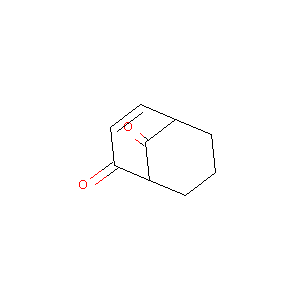

In [7]:
Chem.Draw.MolToImage(Chem.Mol(Chem.MolFromSmiles("C1C(C2(=O))C(=O)C=CC2CC1")))